In [1]:
from cgisim_sims import cgisim_sims
import matplotlib.pylab as plt
import proper
import roman_phasec_proper
import numpy as np
import astropy.io.fits as pyfits
from scipy.ndimage import rotate
import cgisim

In [2]:
cgisim_obj = cgisim_sims()

# Set DM solutions
dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/hlc_best_contrast_dm1.fits')
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/hlc_best_contrast_dm2.fits')
cgisim_obj.options['dm1'] = dm1
cgisim_obj.options['dm2'] = dm2

In [3]:
name_scene = 'custom_spectrum_companion2_rollsandRef_Jup5au'
flag_use_emccd = False

In [5]:
# Science target star
star_vmag = 5.0
cgisim_obj.sources[0]['star_vmag'] = star_vmag
cgisim_obj.sources[0]['star_type'] = 'g0v'
cgisim_obj.sources[0]['name'] = '~Sun'

# Reference star
starref_vmag = 5.04
cgisim_obj.sources[1]['star_vmag'] = starref_vmag
cgisim_obj.sources[1]['star_type'] = 'g0v'
cgisim_obj.sources[1]['name'] = 'rPup'

# Planet 1
planet_vmag = 25.56454656787905 # calculated in convert_albedo_spectra_for_CGISim.ipynb
cgisim_obj.sources[2]['star_vmag'] = planet_vmag
cgisim_obj.sources[2]['star_type'] = 'Jupiter_1x_5AU_0deg_Angstroms_flam'
cgisim_obj.sources[2]['name'] = 'Jupiter_1x_5AU_0deg'

In [6]:
# Read in LOWFE
datadir_Z411 = "/Users/sammyh/Codes/cgisim_sims/data/hlc_os11_v2/" # "../cgisim_sims/data/hlc_os11_v2/"
flnm_Z411 = "hlc_os11_inputs.fits"
inFile = pyfits.open(datadir_Z411+flnm_Z411)
hlc_os11_inputs = inFile[0].data

# Retrieve jitter values
jitt_sig_x_arr = hlc_os11_inputs[:,78] * 1 # [masRMS]
jitt_sig_y_arr = hlc_os11_inputs[:,79] * 1 # [masRMS]

# Retrieve Z4-Z11 values
z411_mat = hlc_os11_inputs[:,46:54]

In [7]:
# Create scene
# Batch IDs -- for naming
batch_id_os11 = hlc_os11_inputs[:,2]

# Create scene with LO errors
cgisim_obj.generate_scene(name=name_scene,jitter_x=jitt_sig_x_arr,jitter_y=jitt_sig_y_arr,
                          zindex=np.arange(4,11+1),zval_m=z411_mat)

# Initialize schedule_index_array
cgisim_obj.scene['schedule']['schedule_index_array'] = []

In [8]:
# Observe reference target
index_batch_ref = 0
batch_ID = 0
num_frames_ref = len(np.where(batch_id_os11==batch_ID)[0])
sourceid_ref = 1 # choose the star
V3PA = 0         # roll angle
exptime = 30     
cgisim_obj.scene['schedule']['batches'][0] = {'num_timesteps':num_frames_ref,
                                                 'batch_ID':batch_ID,
                                                 'sourceid':sourceid_ref,
                                                 'exptime':exptime,
                                                 'V3PA':V3PA}
cgisim_obj.scene['schedule']['schedule_index_array'].append(np.ones(num_frames_ref)*index_batch_ref)

In [9]:
# Science observation roll 1
index_batch_roll1 = 1
batch_ID = 100
num_frames_roll1 = len(np.where(batch_id_os11==batch_ID)[0])
sourceid_sci = 0    # choose source star
V3PA_roll1 = 13     # roll angle
exptime = 30
cgisim_obj.scene['schedule']['batches'].append({'num_timesteps':num_frames_roll1,
                                                 'batch_ID':batch_ID,
                                                 'sourceid':sourceid_sci,
                                                 'exptime':exptime,
                                                 'V3PA':V3PA_roll1})
cgisim_obj.scene['schedule']['schedule_index_array'].append(np.ones(num_frames_ref)*index_batch_roll1)

In [10]:
# Science observation roll 2
index_batch_roll2 = 2
batch_ID = 101
# num_frames_roll2 = 3
num_frames_roll2 = len(np.where(batch_id_os11==batch_ID)[0])
sourceid_sci = 0 # what star?
V3PA_roll2 = -13 #roll angle
exptime = 30
cgisim_obj.scene['schedule']['batches'].append({'num_timesteps':num_frames_roll2,
                                                 'batch_ID':batch_ID,
                                                 'sourceid':sourceid_sci,
                                                 'exptime':exptime,
                                                 'V3PA':V3PA_roll2})
cgisim_obj.scene['schedule']['schedule_index_array'].append(np.ones(num_frames_ref)*index_batch_roll2)

Location of point source in DH: For planet 2 AU from its star in a system that is 10 pc away, separation is 0.19998"
- Jupiter at 5 au, system at d = 15pc, separation = 0.333304"

In [11]:
# Add point source companion to scene
cgisim_obj.add_point_source_to_scene(sourceid=2, central_sourceid=0, xoffset=334, yoffset=334) # offset in mas

In [12]:
# Run scene simulation:
cgisim_obj.generate_speckleSeries_from_scene(num_images_printed=0,flag_return_contrast=True,
                                             use_emccd=False,use_photoncount=False)

Starting the simulation of scene 'custom_spectrum_companion2_rollsandRef_Jup5au'
Computing image num. 1 out of 45
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing normalization factor
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Reading in the jitter parameters and EFs into a cube
Computing image num. 2 out of 45
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 3 out of 45
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 4 out of 45
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 5 out of 45
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes

Computing image num. 8 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 9 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 10 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 11 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 12 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 13 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 14 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to comput

Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 65 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 66 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 67 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 68 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 69 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 70 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 71 out of 99
Computi

Computing image num. 21 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 22 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.5 minutes.
Total time to compute =    0.5 minutes.
Computing image num. 23 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 24 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 25 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 26 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 27 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to comp

Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 78 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 79 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 80 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 81 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing image num. 82 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 83 out of 99
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.4 minutes.
Total time to compute =    0.4 minutes.
Computing image num. 84 out of 99
Computi

In [13]:
 cgisim_obj.scene['outdir']

'output/SpeckleSeries/custom_spectrum_companion2_rollsandRef_Jup5au/'

In [14]:
# Post-processing
# Get where images are located and set path for outputting images
datadir = cgisim_obj.scene['outdir']
outdir_images = datadir

# Get reference image
flnm = 'Ii_coadded_batch0.fits'
data = pyfits.open(datadir + flnm)
im_ref = data[0].data

# Get roll 1
flnm = 'Ii_coadded_batch100.fits'
data = pyfits.open(datadir + flnm)
im_roll1 = data[0].data

# Get roll 2
flnm = 'Ii_coadded_batch101.fits'
data = pyfits.open(datadir+flnm)
im_roll2 = data[0].data

# Subtract reference from rolls
im_sub1 = im_roll1 - im_ref
im_sub2 = im_roll2 - im_ref

# Derotate
im1 = rotate(im_sub1, V3PA_roll1)
im2 = rotate(im_sub2, V3PA_roll2)

# Co-add
im_final = (im1 + im2) / 2

# Write to file
hdulist = pyfits.PrimaryHDU(im_final)
hdulist.writeto(outdir_images+'post_processed_wcontrast.fits',overwrite=True)

In [15]:
# read in from file instead of re-processing everything
# im_final = pyfits.getdata(outdir_images+'post_processed.fits')

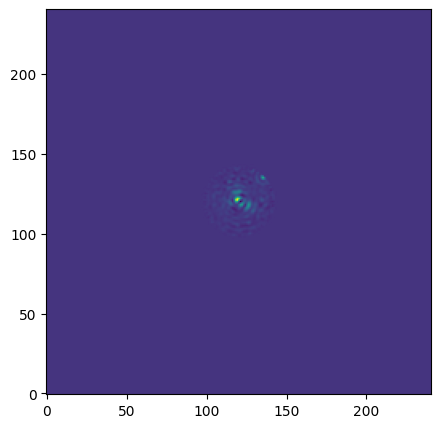

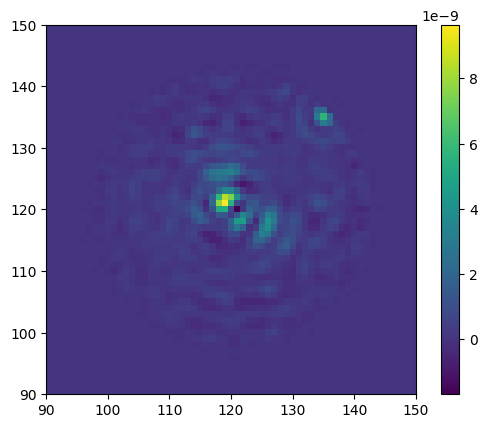

In [24]:
# Take a look at post-processed image output
plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
plt.imshow(im_final, origin='lower')
# plt.savefig('/Users/sammyh/Desktop/coadded_jupiter_2au_0deg.png', dpi='figure', bbox_inches='tight')
plt.show()

# plt.subplot(1,2,2)
plt.imshow(im_final, origin='lower')
plt.colorbar()
plt.xlim([90,150])
plt.ylim([90,150])
# plt.savefig('/Users/sammyh/Desktop/coadded_jupiter_5au_0deg_zoomed.png', dpi='figure', bbox_inches='tight')
plt.show()

In [17]:
# TODO: get contrast of point source, convert back to flux 
import photutils as pu
from photutils.detection import find_peaks
from astropy.stats import sigma_clipped_stats

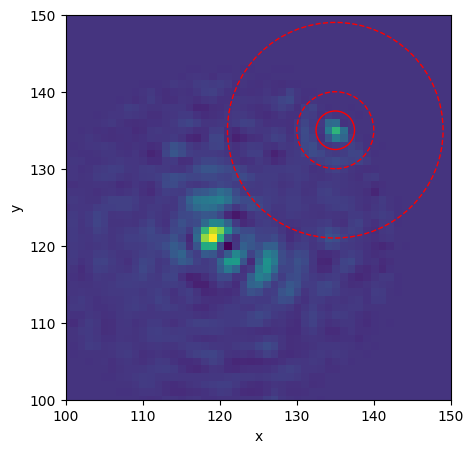

counts:  2.2140690384829835e-08


In [23]:
point_center = (135,135) # x,y coordinates of center of point source
r_ap = 2.5
fig = plt.figure(figsize=(6,5))
plt.imshow(im_final, origin='lower')

aperture = pu.CircularAperture(point_center, r=r_ap)
ann_aperture = pu.CircularAnnulus(point_center, r_in=5, r_out=14)
both_aps = [aperture, ann_aperture]
phot_table = pu.aperture_photometry(im_final, both_aps)
bkg_mean = phot_table['aperture_sum_1'] / ann_aperture.area
total_bkg = bkg_mean * aperture.area
final_sum = (phot_table['aperture_sum_0'] - total_bkg)

ap_patches = aperture.plot(color='red', lw=1)

ann_patches = ann_aperture.plot(color='red', lw=1, linestyle='dashed')
handles = (ap_patches[0], ann_patches[0])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([100,150])
plt.ylim([100,150])
plt.show()

print('counts: ', final_sum[0])